In [1]:
import crawler
import word_research

In [2]:
cc = crawler.crawler()
acl = cc.acl2023_crawler()

f = open('./acl_titles.txt', 'w')
for i in acl:
    f.write(f'{i}\n')
f.close()

100%|██████████| 1074/1074 [00:00<00:00, 214795.08it/s]


In [3]:
titles = []
for i in acl:
    titles.append(i.lower())\

print(titles)

['the elephant in the room: analyzing the presence of big tech in natural language processing research', 'how about kind of generating hedges using end-to-end neural models?', 'what are the desired characteristics of calibration sets? identifying correlates on long form scientific summarization', 'generating edu extracts for plan-guided summary re-ranking', 'the cringe loss: learning what language not to model', 'multimodal persona based generation of comic dialogs', 'script normalization for unconventional writing of under-resourced languages in bilingual communities', 'mpchat: towards multimodal persona-grounded conversation', 'on-the-fly cross-lingual masking for multilingual pre-training', 'early discovery of disappearing entities in microblogs', 'prompter: zero-shot adaptive prefixes for dialogue state tracking domain adaptation', 'rl4f: generating natural language feedback with reinforcement learning for repairing model outputs', 'lexsym: compositionality as lexical symmetry', 'a

In [4]:
import re
from collections import Counter
# Function to extract words and count their frequency
def extract_and_count_words(titles):
    word_counter = Counter()
    for title in titles:
        # Split title into words based on spaces and punctuation, then convert to lowercase
        words = re.findall(r'\b\w+\b', title.lower())
        word_counter.update(words)
    return word_counter

# 단어 추출 및 빈도수 기록
word_counts = extract_and_count_words(titles)
# 정렬
sorted_word_counts = word_counts.most_common()
# 출력
for word, count in sorted_word_counts:
    print(f"{word}: {count}")

for: 446
and: 240
language: 239
of: 216
a: 205
with: 194
in: 187
models: 163
learning: 139
to: 135
the: 129
generation: 97
text: 96
multi: 83
knowledge: 81
via: 78
model: 69
based: 69
translation: 67
pre: 61
extraction: 61
on: 57
shot: 56
training: 53
reasoning: 52
dialogue: 48
cross: 47
machine: 46
question: 46
large: 43
efficient: 42
from: 42
an: 42
answering: 42
domain: 41
dataset: 41
multilingual: 40
data: 40
fine: 39
tuning: 39
towards: 38
detection: 38
understanding: 38
event: 37
evaluation: 37
summarization: 36
context: 36
graph: 36
neural: 35
level: 35
zero: 34
modeling: 34
trained: 34
retrieval: 33
document: 33
speech: 33
framework: 32
recognition: 32
entity: 31
improving: 31
natural: 30
relation: 30
contrastive: 29
open: 29
semantic: 28
information: 27
multimodal: 26
aware: 26
few: 25
by: 25
lingual: 24
human: 24
classification: 24
using: 23
generalization: 23
approach: 23
analysis: 23
robust: 22
unsupervised: 22
task: 22
modal: 21
transfer: 21
prompt: 21
what: 20
self: 20
re

단순 영단어에 해당하는 빈도수는 출력이 가능 그러나 현재 전체적인 논문의 트렌드나, 연구중인 분야를 파악하기에는 적합한 결과가 나오지 않음

In [5]:
print(titles)

['the elephant in the room: analyzing the presence of big tech in natural language processing research', 'how about kind of generating hedges using end-to-end neural models?', 'what are the desired characteristics of calibration sets? identifying correlates on long form scientific summarization', 'generating edu extracts for plan-guided summary re-ranking', 'the cringe loss: learning what language not to model', 'multimodal persona based generation of comic dialogs', 'script normalization for unconventional writing of under-resourced languages in bilingual communities', 'mpchat: towards multimodal persona-grounded conversation', 'on-the-fly cross-lingual masking for multilingual pre-training', 'early discovery of disappearing entities in microblogs', 'prompter: zero-shot adaptive prefixes for dialogue state tracking domain adaptation', 'rl4f: generating natural language feedback with reinforcement learning for repairing model outputs', 'lexsym: compositionality as lexical symmetry', 'a

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare the text data
text_data = [" ".join( word_tokenize(title.lower())) for title in titles]

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)


NameError: name 'word_tokenize' is not defined

TOPIC MODELING  Latent Dirichlet allocation, LDA (문서 전체의 단어를 분석할 때에 더 효율적일 것으로 보임)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('via')

# Prepare the text data by tokenizing and removing stopwords
def preprocess_titles(titles):
    processed_titles = []
    for title in titles:
        words = word_tokenize(title.lower())
        filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
        processed_titles.append(" ".join(filtered_words))
    return processed_titles

text_data = preprocess_titles(titles)

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42) # n_components개의 토픽 # max_iter=max_iter 만큼 최대 반복
lda.fit(X)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10 #각 토픽에서 상위 OO 개의 단어
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jjune\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jjune\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic 1:
learning question answering recognition generation framework dialogue retrieval knowledge entity
Topic 2:
language models learning model large event natural extraction generation reasoning
Topic 3:
learning knowledge generation dialogue graph neural text detection multilingual code
Topic 4:
extraction entity semantic data knowledge language relation detection generalization machine
Topic 5:
translation machine text understanding language model neural hierarchical evaluation generation


In [ ]:
display_topics(lda, feature_names, no_top_words)

Topic 1:
learning question answering recognition generation framework dialogue retrieval knowledge entity
Topic 2:
language models learning model large event natural extraction generation reasoning
Topic 3:
learning knowledge generation dialogue graph neural text detection multilingual code
Topic 4:
extraction entity semantic data knowledge language relation detection generalization machine
Topic 5:
translation machine text understanding language model neural hierarchical evaluation generation


토픽 1:
Generation of Text and Dialogue Using Multilingual Knowledge

이 토픽은 다국적 지식을 활용한 텍스트 및 대화 생성에 관한 것입니다. 주요 단어들인 "generation", "text", "learning", "dialogue", "dataset", "model", "knowledge", "via", "multilingual", "question" 등은 다국적 데이터와 지식을 기반으로 한 텍스트 생성 및 대화 모델링에 중점을 둔 연구들을 나타낼 수 있습니다.

토픽 2:
Knowledge Extraction and Relation Learning Across Texts

이 토픽은 텍스트 간의 관계 학습과 지식 추출에 관한 것입니다. 주요 단어들인 "extraction", "knowledge", "learning", "relation", "event", "translation", "speech", "text", "distillation" 등은 텍스트에서 지식을 추출하고 관계를 학습하는 연구에 중점을 둔 주제를 나타냅니다.

토픽 3:
Language Generation and Translation Evaluation

이 토픽은 언어 생성, 번역 평가에 관한 것입니다. 주요 단어들인 "learning", "generation", "translation", "machine", "extraction", "representation", "language", "evaluation", "text", "detection" 등은 언어 생성과 번역 평가에 관련된 연구를 나타냅니다.

토픽 4:
Large Language Models and Understanding Towards Entity Recognition

이 토픽은 대형 언어 모델과 엔티티 인식을 향한 이해에 관한 것입니다. 주요 단어들인 "language", "models", "large", "learning", "understanding", "recognition", "towards", "entity", "reasoning", "model" 등은 대규모 언어 모델을 활용한 엔티티 인식 및 이해에 대한 연구를 의미합니다.

토픽 5:
Learning and Generalization in Question Answering Without Code

이 토픽은 코드 없이 질문 답변에서의 학습과 일반화에 관한 것입니다. 주요 단어들인 "learning", "generalization", "answering", "question", "compositional", "using", "via", "embeddings", "without", "code" 등은 코드 없이 학습된 모델이 질문 답변 과제에서 어떻게 학습하고 일반화하는지에 대한 연구를 나타냅니다.                                                 


   GPT-3 의 분석

Topic 1: multilingual , text , generation ? 다국어 문장 생성? 
generation text learning dialogue dataset model knowledge via multilingual question
Topic 2: extraction  , relation , 추출 , 관계 distillation 증류? -> 비전공자는 뭔지 모름 아는놈은 알수도?
extraction knowledge via learning relation event translation speech text distillation
Topic 3: translation , extraction  , languange , evaluation , detecrion , 번역 , 추출 ,언어 , 평가  번역된 텍스트에 대한 평가? 
learning generation translation machine extraction representation language evaluation text detection
Topic 4: large , recognition ,entity  ,대형모델 , 인식 ? 
language models large learning understanding recognition towards entity reasoning model
Topic 5: without code answering question generalization  일반화 ,  문답 , 코드없이 ?
learning generalization answering question compositional using via embeddings without code

단어만 특정해서 보면 중복되는 단어가 많음 , 주제를 단번에 파악하기에는 어려우나, 그것이 비전공자의 한계인지는 잘 모름 넓고 얕은 지식으로는 이정도의 추론? 

GPT의 해석을 통해서 보면 각 토픽마다 핵심이되는 단어가 몇개 있는것 같음


In [8]:
# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords
stop_words = set(stopwords.words('english'))
# Prepare the text data by tokenizing and removing stopwords
def preprocess_titles(titles):
    processed_titles = []
    for title in titles:
        words = word_tokenize(title.lower())
        filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
        processed_titles.append(" ".join(filtered_words))
    return processed_titles

text_data = preprocess_titles(titles)

# Vectorize the text data with n-gram range
vectorizer = CountVectorizer(ngram_range=(1, 2))  # n-gram range 설정
X = vectorizer.fit_transform(text_data)

# Fit LDA model
n_topics = 5  # 토픽 개수 설정
max_iter = 100  # 최대 반복 횟수 설정
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=max_iter, random_state=42)
lda.fit(X) 

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        #print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print([feature_names[i] for i in topic.argsort()[::-1]])
        print()  # 각 토픽 사이에 빈 줄 추가


# 주제와 상위 단어 출력
no_top_words = 10  # 각 토픽에서 출력할 상위 단어 개수 설정
feature_names = vectorizer.get_feature_names_out()
#display_topics(lda, feature_names, no_top_words)


'''
lda 문서에서 문장을 쭉 읽고 내용 요약 << 중심 단어 추출 
논문제목 리스트 << 일관성이 있다고 생각하지는 않음 (AI 공통주제)
굵직한거 다섯개만 뽑아 봐라 n_topics = 5  # 토픽 개수 설정 
거기서 각 토픽에 중요한 단어들 10개씩 뽑아봐라 no_top_words = 10  # 각 토픽에서 출력할 상위 단어 개수 설정
내가 하고싶은건 워드 크라우드로 출력할 데이터를 뽑을 거면
'''


# lda 적용하기 전에 불용어를 삭제하지 않고 결과 도출
# 제거한 결과와 제가하지 않은 결과를 비교하고 더 나은 것을 정제
# 각 토픽에 해당하는 단어리스트 합치고 중복제거해서 하나의 리스트로 만들기
# 토픽을 나눠 생각할 이유가 없음
# 중심 단어를 추출하는것이 중요


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jjune\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jjune\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'\nlda 문서에서 문장을 쭉 읽고 내용 요약 << 중심 단어 추출 \n논문제목 리스트 << 일관성이 있다고 생각하지는 않음 (AI 공통주제)\n굵직한거 다섯개만 뽑아 봐라 n_topics = 5  # 토픽 개수 설정 \n거기서 각 토픽에 중요한 단어들 10개씩 뽑아봐라 no_top_words = 10  # 각 토픽에서 출력할 상위 단어 개수 설정\n내가 하고싶은건 워드 크라우드로 출력할 데이터를 뽑을 거면\n'

In [9]:
def filter_by_inclusion(text_list, max_results):
    # 항목을 포함하는지 확인할 항목을 저장할 리스트를 생성합니다.
    result = []
    for item in text_list:
        # 현재 항목이 다른 모든 항목을 포함하는지 확인합니다.
        if any(item != other and all(sub in item for sub in other.split()) for other in text_list):
            if len(result) < max_results:
                result.append(item)
            else:
                break
    return result

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        word_list = []
        print(f"Topic {topic_idx + 1}:")
        #print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print([feature_names[i] for i in topic.argsort()[::-1]])
        #print()  # 각 토픽 사이에 빈 줄 추가   
        for i in topic.argsort()[::-1]:
            word_list.append(feature_names[i])
        print(filter_by_inclusion(word_list, no_top_words))
        print()  # 각 토픽 사이에 빈 줄 추가  


# 주제와 상위 단어 출력
no_top_words = 10  # 각 토픽에서 출력할 상위 단어 개수 설정
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)


# lda 적용하기 전에 불용어를 삭제하지 않고 결과 도출
# 제거한 결과와 제가하지 않은 결과를 비교하고 더 나은 것을 정제
# 각 토픽에 해당하는 단어리스트 합치고 중복제거해서 하나의 리스트로 만들기
# 토픽을 나눠 생각할 이유가 없음
# 중심 단어를 추출하는것이 중요

Topic 1:
['language', 'models', 'learning', 'knowledge', 'language models', 'via', 'event', 'extraction', 'generation', 'model', 'distillation', 'recognition', 'data', 'entity', 'translation', 'relation', 'chinese', 'answering', 'knowledge distillation', 'question', 'question answering', 'dialogue', 'reasoning', 'detection', 'towards', 'unsupervised', 'study', 'named entity', 'named', 'dataset', 'transfer', 'modeling', 'correction', 'better', 'relation extraction', 'evaluation', 'hierarchical', 'tuning', 'entity recognition', 'representation', 'language model', 'text', 'framework', 'augmentation', 'prompting', 'domain', 'speech', 'data augmentation', 'error', 'robust', 'classification', 'table', 'dynamic', 'training', 'commonsense', 'efficient', 'prediction', 'enhanced', 'network', 'prompt', 'analysis', 'event detection', 'multimodal', 'error correction', 'based', 'contrastive', 'automatic', 'discourse', 'code', 'instruction', 'sentence', 'masked', 'dialogue generation', 'label', 'syst

In [ ]:
def has_space(word):
    """
    단어에 공백이 있는지 확인합니다.
    
    :param word: 확인할 단어 (예: 'language models')
    :return: 공백이 있으면 True, 없으면 False
    """
    return ' ' in word
for i in word_list:
    #if has_space(i):
        print(i)

language
models
learning
knowledge
language models
via
event
extraction
generation
model
question
answering
question answering
learning
knowledge
detection
generation
dialogue
extraction
summarization
language
learning
translation
machine
machine translation
model
neural
models
via
knowledge
language
models
language models
generation
learning
large
large language
text
understanding
natural
models
language
learning
language models
via
text
generation
extraction
text generation
model


In [10]:
word_list = []
def add_words(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        #word_list.append([feature_names[i] for i in topic.argsort()[::-1]])
        for i in topic.argsort()[:-no_top_words - 1:-1]:
            word_list.append(feature_names[i])

add_words(lda, feature_names, no_top_words)
#for i in word_list:
    #print(i)

In [11]:
from collections import Counter

def count_word_frequencies(word_list):
    # 각 단어의 출현 횟수를 계산
    word_count = Counter(word_list)
    
    # (단어, 출현 횟수) 형태의 2차원 배열로 변환
    counted_list = [[word, count] for word, count in word_count.items()]

    # 출현 횟수에 따라 내림차순으로 정렬
    counted_list.sort(key=lambda x: x[1], reverse=True)
    
    return counted_list

# 예시 사용
result = count_word_frequencies(word_list)
#print(result)
print()
'''
for i in result:
    print(i)
'''
sum = 0
for i in result:
    sum += i[1]
print(sum)


50


In [12]:
for i in result: # 각 단어와 빈도수 출력
    print(i)

sum = 0 # 단어의 총 합
for i in result:
    sum += i[1]

print("단어 총계 : ",sum)


['learning', 5]
['language', 4]
['models', 4]
['generation', 4]
['knowledge', 3]
['language models', 3]
['via', 3]
['extraction', 3]
['model', 3]
['text', 2]
['event', 1]
['question', 1]
['answering', 1]
['question answering', 1]
['detection', 1]
['dialogue', 1]
['summarization', 1]
['translation', 1]
['machine', 1]
['machine translation', 1]
['neural', 1]
['large', 1]
['large language', 1]
['understanding', 1]
['natural', 1]
['text generation', 1]
단어 총계 :  50


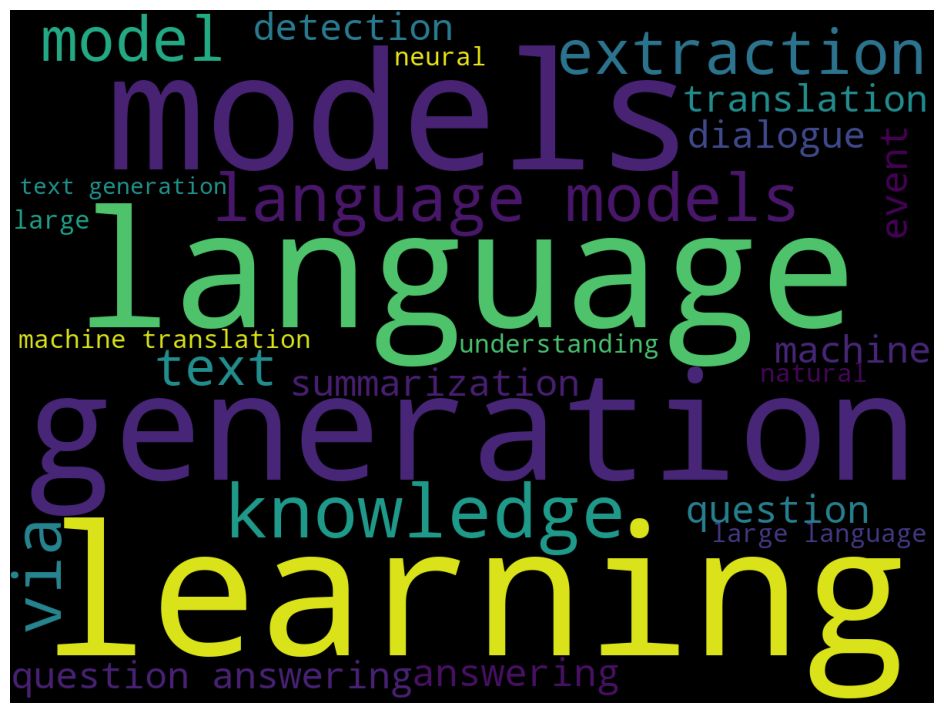

In [14]:
#result
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=1200, height=900,
                            max_words=100,
                            #    background_color='white'
                            )
cloud = wc.generate_from_frequencies(dict(result))
plt.figure(figsize=(12,9))
plt.axis('off')
plt.imshow(cloud)